# Hello World practice
This is just my hello world practice to get familiar with PyTorch. It roughly follows the steps below.

1. load MNIST data (`torchvision.datasets.MNIST`)
1. build a model (`class Net(nn.Module)`)
1. instanciate the model (`model`, `optimizer`, `criterion`)
1. learn the model with the training dataset (the for-loops)
1. evaluate the model (the second for-loops)
1. predict the labes for the first batch of test data

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# data loader
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


In [ ]:
# network definition
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 10)
    # self.fc1 = nn.Linear(28*28, 256)
    # self.fc2 = nn.Linear(256, 128)
    # self.fc3 = nn.Linear(128, 10)
  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    return self.fc2(x)
    # x = x.view(-1, 28*28)
    # x = F.relu(self.fc1(x))
    # x = F.relu(self.fc2(x))
    # return self.fc3(x)

if torch.cuda.is_available():
  print('cuda available')
else:
  print('cuda not available')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)

optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

cuda not available


In [ ]:
# learning
for epoch in range(5):
  for images, labels in trainloader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

In [ ]:
# evaluation
model.eval() # turn on the evaluation mode

correct = 0
total = 0

with torch.no_grad(): # no gradient calculation
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.9761


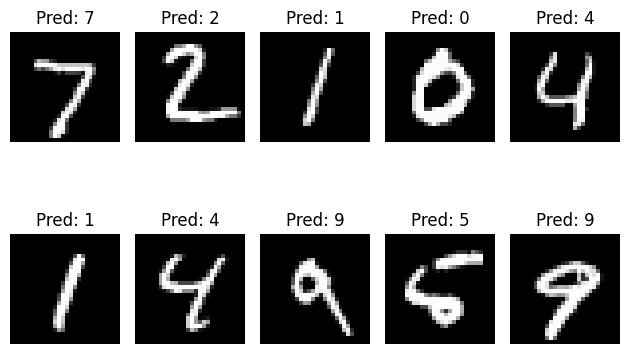

In [ ]:
# prediction
data_iter = iter(testloader)
images, labels = next(data_iter)
images = images.to(device)
labels = labels.to(device)
model.eval()
with torch.no_grad():
    outputs = model(images)
    predicted = torch.argmax(outputs, dim=1)

import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Pred: {predicted[i].item()}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# to save
# model_cpu = model.to('cpu')
# torch.save(model_cpu.state_dict(), "model_mnist.pt")

# to load
# model = Net()
# model.load_state_dict(torch.load("model_mnist.pt", map_location=device))
# model.to(device)